In [8]:
from sklearn import preprocessing
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import os
import cv2 as cv
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import math

**(1) To Read Image, CSV File and to perform TCI Claculation, Labelling**

In [9]:
ref_lca = 26.1
ref_lpa = 25.7
ref_mca = 26.4
ref_mpa = 25.8
fixed_size = tuple((70, 150))

def print_arr(data, value):
    i = 0
    while i < len(data):
        if i == 0:
            print("\n")
        print(value[i], ":", data[i])
        i = i + 1

def mean(arr):
    Sum = 0
    count = 0
    for i in arr:
        for y in i:
            if y != 0:
                Sum = Sum + y
                count = count + 1
    return round((Sum / count), 2)

def sub(arr, ang):
    arr = np.subtract(arr, ang)
    i = 0
    while i < len(arr):
        if arr[i] < 0:
            arr[i] = arr[i] * (-1)
        i = i + 1
    return np.array(arr)

def read_file(path):
    ''' mylis -> The path were all images are located '''
    mylis = os.listdir(path)
    tem = []
    data = []
    img = []

    ''' Read all files: '''
    for im in mylis:
        file, ext = im.split(".")
        lab_cont = path.split("/")
        if ext == "csv":
            # print(os.path.abspath(os.path.join( path, im)))
            array = np.loadtxt(f'{path}/{im}', delimiter=',')
            data.append(file)
            tem.append(mean(array))
        if lab_cont[3] == 'general' and ext == 'png':
            image = cv.imread(f'{path}/{im}')
            img.append(cv.resize(image, fixed_size))

    ''' Return the images array '''
    tem, data, img = np.array(tem), np.array(data), np.array(img)
    if np.shape(img) != (0,):
        return tem, data, img
    else:
        return tem, data

'TCI Calculation'
def TCI(lca, lpa, mca, mpa):
    Tci = np.round(((sub(lca, ref_lca) + sub(lpa, ref_lpa) + sub(mca, ref_mca) + sub(mpa, ref_mpa)) / 4), 2)
    lab = np.zeros(Tci.shape)
    i = 0
    while i < len(Tci):
        if Tci[i]>1.5 and Tci[i]<=3:
            lab[i]= 1
        if Tci[i]>3 and Tci[i]<=5:
            lab[i] = 2
        elif Tci[i]>5:
            lab[i] = 3
        i = i + 1
    return Tci, lab

In [10]:
def main():
    cg_LF_lca, cg_LF_lca_dt = read_file("dataset/control group/Left foot/Angiosoms/LCA/")
    cg_LF_lpa, cg_LF_lpa_dt = read_file("dataset/control group/Left foot/Angiosoms/LPA/")
    cg_LF_mca, cg_LF_mca_dt = read_file("dataset/control group/Left foot/Angiosoms/MCA/")
    cg_LF_mpa, cg_LF_mpa_dt = read_file("dataset/control group/Left foot/Angiosoms/MPA/")

    cg_RF_lca, cg_RF_lca_dt = read_file("dataset/control group/Right foot/Angiosoms/LCA/")
    cg_RF_lpa, cg_RF_lpa_dt = read_file("dataset/control group/Right foot/Angiosoms/LPA/")
    cg_RF_mca, cg_RF_mca_dt = read_file("dataset/control group/Right foot/Angiosoms/MCA/")
    cg_RF_mpa, cg_RF_mpa_dt = read_file("dataset/control group/Right foot/Angiosoms/MPA/")

    dm_LF_lca, dm_LF_lca_dt = read_file("dataset/Diabetic melitus/Left foot/Angiosoms/LCA/")
    dm_LF_lpa, dm_LF_lpa_dt = read_file("dataset/Diabetic melitus/Left foot/Angiosoms/LPA/")
    dm_LF_mca, dm_LF_mca_dt = read_file("dataset/Diabetic melitus/Left foot/Angiosoms/MCA/")
    dm_LF_mpa, dm_LF_mpa_dt = read_file("dataset/Diabetic melitus/Left foot/Angiosoms/MPA/")

    dm_RF_lca, dm_RF_lca_dt = read_file("dataset/Diabetic melitus/right foot/Angiosoms/LCA/")
    dm_RF_lpa, dm_RF_lpa_dt = read_file("dataset/Diabetic melitus/right foot/Angiosoms/LPA/")
    dm_RF_mca, dm_RF_mca_dt = read_file("dataset/Diabetic melitus/right foot/Angiosoms/MCA/")
    dm_RF_mpa, dm_RF_mpa_dt = read_file("dataset/Diabetic melitus/right foot/Angiosoms/MPA/")

    cg_RF_TCI, cg_RF_TCI_label = (TCI(cg_RF_lca, cg_RF_lpa, cg_RF_mca, cg_RF_mpa))
    cg_LF_TCI, cg_LF_TCI_label = (TCI(cg_LF_lca, cg_LF_lpa, cg_LF_mca, cg_LF_mpa))

    dm_RF_TCI, dm_RF_TCI_label = TCI(dm_RF_lca, dm_RF_lpa, dm_RF_mca, dm_RF_mpa)
    dm_LF_TCI, dm_LF_TCI_label = TCI(dm_LF_lca, dm_LF_lpa, dm_LF_mca, dm_LF_mpa)


    return cg_RF_TCI, cg_RF_TCI_label, cg_LF_TCI, cg_LF_TCI_label,dm_RF_TCI,dm_RF_TCI_label, dm_LF_TCI, dm_LF_TCI_label


cg_LF_gn, cg_LF_gn_dt, cg_LF_img = read_file("dataset/control group/Left foot/general/")

cg_RF_gn, cg_RF_gn_dt,cg_RF_img = read_file("dataset/control group/Right foot/general/")

dm_LF_gn, dm_LF_gn_dt, dm_LF_img = read_file("dataset/Diabetic melitus/Left foot/general/")

dm_RF_gn, dm_RF_gn_dt, dm_RF_img = read_file("dataset/Diabetic melitus/right foot/general/")

cg_RF_TCI, cg_RF_TCI_label, cg_LF_TCI, cg_LF_TCI_label,dm_RF_TCI,dm_RF_TCI_label, dm_LF_TCI, dm_LF_TCI_label = main()

print_arr(cg_LF_TCI, cg_LF_gn_dt)
print_arr(cg_RF_TCI, cg_RF_gn_dt)
print_arr(dm_LF_TCI, dm_LF_gn_dt)
print_arr(dm_RF_TCI, dm_RF_gn_dt)



CG001_M_L : 0.47
CG002_M_L : 2.09
CG003_M_L : 3.57
CG004_F_L : 1.5
CG005_F_L : 0.81
CG006_F_L : 1.03
CG007_F_L : 0.57
CG008_F_L : 1.76
CG009_M_L : 1.14
CG010_M_L : 0.84
CG011_F_L : 0.17
CG012_F_L : 2.07
CG013_M_L : 0.74
CG014_M_L : 2.44
CG015_M_L : 2.93
CG016_M_L : 1.75
CG017_F_L : 2.11
CG018_M_L : 1.09
CG019_F_L : 0.18
CG020_F_L : 2.49
CG021_M_L : 0.56
CG022_M_L : 0.75
CG023_F_L : 1.02
CG024_F_L : 0.58
CG025_M_L : 1.56
CG026_M_L : 1.62
CG027_M_L : 0.86
CG028_M_L : 0.27
CG029_F_L : 0.46
CG030_M_L : 0.7
CG031_M_L : 1.33
CG032_M_L : 0.91
CG033_M_L : 2.68
CG034_M_L : 1.84
CG035_M_L : 1.34
CG036_M_L : 0.34
CG037_M_L : 2.66
CG038_M_L : 0.34
CG039_M_L : 2.9
CG040_M_L : 2.95
CG041_F_L : 1.45
CG042_F_L : 0.41
CG043_M_L : 1.22
CG044_F_L : 3.86
CG045_M_L : 2.4


CG001_M_R : 0.12
CG002_M_R : 1.97
CG003_M_R : 3.79
CG004_F_R : 1.82
CG005_F_R : 0.29
CG006_F_R : 0.79
CG007_F_R : 0.21
CG008_F_R : 1.88
CG009_M_R : 1.38
CG010_M_R : 1.16
CG011_F_R : 0.38
CG012_F_R : 2.22
CG013_M_R : 0.34
CG014_M_R : 2.

(**2**) **DATA AUGMENTATION**

In [11]:
def data_augumentaion(img, lab):
    im_tem = []
    lb_tem = []
    for i in range(0, (len(lab))):
        im_tem.append(cv.resize(cv.flip(img[i], 1), fixed_size))
        lb_tem.append(lab[i])
        im_tem.append(img[i])
        lb_tem.append(lab[i])
    return im_tem, lb_tem

print(len(cg_LF_img))
print(len(cg_RF_img))
cg_LF_img,cg_LF_TCI_label=data_augumentaion( cg_LF_img,cg_LF_TCI_label)
cg_RF_img, cg_RF_TCI_label=data_augumentaion(cg_RF_img, cg_RF_TCI_label)
print(len(cg_LF_img))
print(len(cg_RF_img))

45
45
90
90


**(3) HOG FEATURE EXTRACTION**

In [12]:
def HOG(X):
    HOG_IMG=[]
    feature_matrix = []
    '''# OBTAIN FEATURE FOR IMAGES IN MATRIX 'X' '''

    for im in X:
        fd, ho =  hog(im, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)
        feature_matrix.append(fd)
        HOG_IMG.append(ho)
        # plt.imshow(ho)
        # plt.show()

    # 3.  Return the dataset & features with respective labels:

    return HOG_IMG, feature_matrix

cg_RF_hog_img,cg_RF_ft = HOG(cg_RF_img)
cg_LF_hog_img,cg_LF_ft = HOG(cg_LF_img)
dm_RF_hog_img,dm_RF_ft = HOG(dm_RF_img)
dm_LF_hog_img,dm_LF_ft = HOG(dm_LF_img)

print(cg_RF_ft)

features = np.concatenate((dm_RF_ft,dm_LF_ft,cg_RF_ft,cg_LF_ft), axis = 0)
labels = np.concatenate((dm_RF_TCI_label,dm_LF_TCI_label,cg_RF_TCI_label,cg_LF_TCI_label) , axis = 0)


[array([0.40114541, 0.55519885, 0.55519885, 0.33081368, 0.05673603,
       0.        , 0.        , 0.33156322, 0.06991542, 0.        ,
       0.1888201 , 0.55113044, 0.55113044, 0.55113044, 0.13436617,
       0.17369582, 0.04563292, 0.        , 0.        , 0.        ,
       0.57657735, 0.57657735, 0.57657735, 0.02435775, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.49535717, 0.13595996, 0.49535717,
       0.49535717, 0.        , 0.        , 0.        , 0.49535717,
       0.19590105, 0.40702663, 0.40702663, 0.40702663, 0.40702663,
       0.40702663, 0.34974897, 0.10461854, 0.        , 0.        ,
       0.00414774, 0.01776892, 0.60117937, 0.60117937, 0.52136884,
       0.07076953, 0.10380253, 0.        , 0.        , 0.        ,
       0.19146595, 0.66758541, 0.66758541, 0.24743742, 0.55045335,
       0.55045335, 0.46752652, 0.21895547, 0.2520999 , 0.12951047,
       0.11693813, 0.18296948, 0.17985199, 0.43914648, 0.4391

**(4) Performing LDA and splitting data for train, test**

In [13]:
lda =  LinearDiscriminantAnalysis()
x_lda=lda.fit_transform(X=features,y=labels)

X_train, X_test, Y_train, Y_test = train_test_split(x_lda,labels,test_size=0.2,random_state=2)

print(X_test)

[[ 4.60935256e+00  2.79099711e+00  1.24720138e-01]
 [-3.16119609e+00  2.00296896e+00  3.41788357e-01]
 [ 1.73292790e+00 -1.97204058e+00 -2.90891467e+00]
 [-2.04845950e+00  2.55179280e+00 -4.68380660e-01]
 [-9.21875254e-01 -5.85852397e+00  1.70565303e+00]
 [ 1.88603805e+00 -1.51570133e+00 -1.28004381e+00]
 [-3.02820919e+00  1.17587699e+00 -1.24552100e+00]
 [-4.28554964e-01 -2.62610152e+00  3.22975560e+00]
 [-6.47764044e-01  2.13955337e-02 -1.45724009e+00]
 [ 5.28474585e+00  2.43009484e+00  2.70255823e+00]
 [-2.69525644e+00 -3.60928588e+00  7.91458942e-01]
 [ 4.15636158e+00  2.49411365e-01  1.67085749e+00]
 [ 2.17726984e-01 -2.61021792e+00  2.85224083e+00]
 [-3.51786047e+00  7.05838736e-01  1.97386317e+00]
 [ 1.07329082e+00 -1.69255991e+00  2.40849820e+00]
 [ 2.47380919e+00 -2.06241540e-01 -1.90422659e+00]
 [-1.08918993e+00  1.64044289e+00  9.25078853e-04]
 [ 4.70876542e-01 -1.38192237e+00 -3.25394630e+00]
 [-8.02424301e-01 -1.51575424e+00  3.14706294e+00]
 [ 6.19118846e+00  2.29059881e+

          LOGISTIC_REGRESSION


D:\project\DFU_Code\Venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "D:\project\DFU_Code\Venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\project\DFU_Code\Venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\project\DFU_Code\Venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1246, in fit
    raise Value

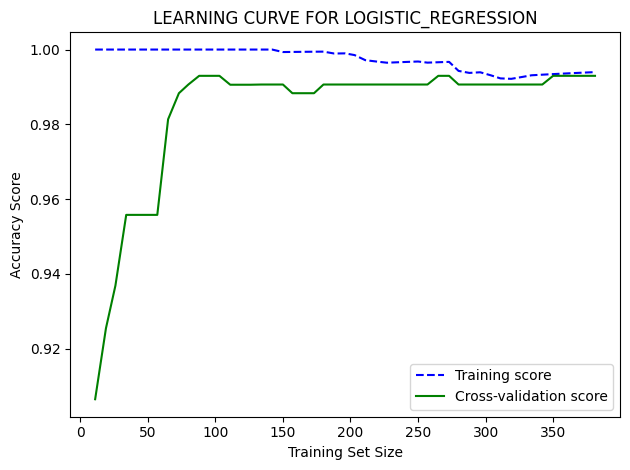

Train Accuracy 99.71%
Test Accuracy 98.82%
Classification Report on the Test dataset:
               precision    recall  f1-score   support

CONTROL GROUP       1.00      0.97      0.98        30
  DFU_LEVEL-1       1.00      1.00      1.00        21
  DFU_LEVEL-2       0.95      1.00      0.97        18
  DFU_LEVEL-3       1.00      1.00      1.00        16

     accuracy                           0.99        85
    macro avg       0.99      0.99      0.99        85
 weighted avg       0.99      0.99      0.99        85



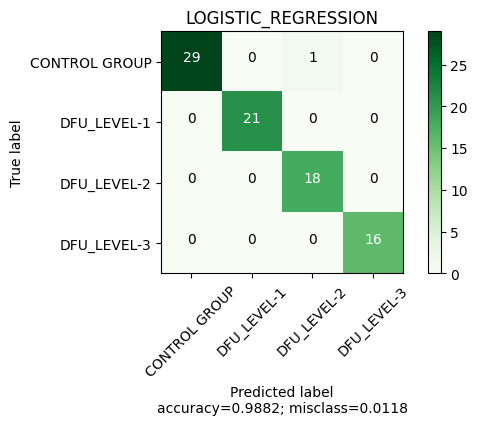

SENSITIVITY: 99.16666666666667
-------------------------------------------------------------------------
          Support_Vector_Machine


D:\project\DFU_Code\Venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "D:\project\DFU_Code\Venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\project\DFU_Code\Venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\project\DFU_Code\Venv\Lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_target

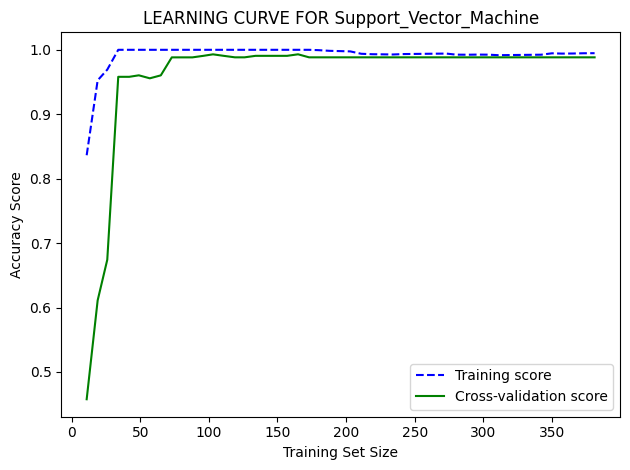

Train Accuracy 99.71%
Test Accuracy 98.82%
Classification Report on the Test dataset:
               precision    recall  f1-score   support

CONTROL GROUP       1.00      0.97      0.98        30
  DFU_LEVEL-1       1.00      1.00      1.00        21
  DFU_LEVEL-2       0.95      1.00      0.97        18
  DFU_LEVEL-3       1.00      1.00      1.00        16

     accuracy                           0.99        85
    macro avg       0.99      0.99      0.99        85
 weighted avg       0.99      0.99      0.99        85



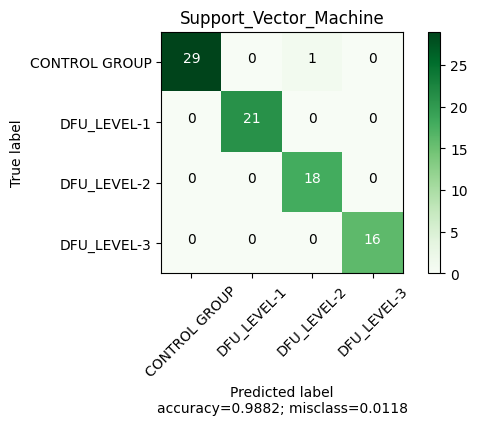

SENSITIVITY: 99.16666666666667
-------------------------------------------------------------------------
          RandomForestClassifier


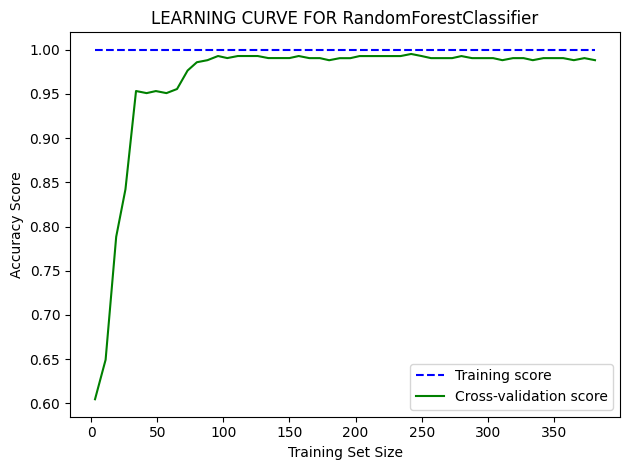

Train Accuracy 100.00%
Test Accuracy 98.82%
Classification Report on the Test dataset:
               precision    recall  f1-score   support

CONTROL GROUP       1.00      0.97      0.98        30
  DFU_LEVEL-1       1.00      1.00      1.00        21
  DFU_LEVEL-2       0.95      1.00      0.97        18
  DFU_LEVEL-3       1.00      1.00      1.00        16

     accuracy                           0.99        85
    macro avg       0.99      0.99      0.99        85
 weighted avg       0.99      0.99      0.99        85



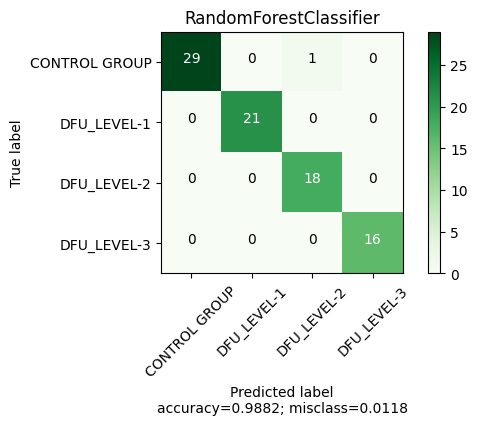

SENSITIVITY: 99.16666666666667
-------------------------------------------------------------------------
          KNeighborsClassifier


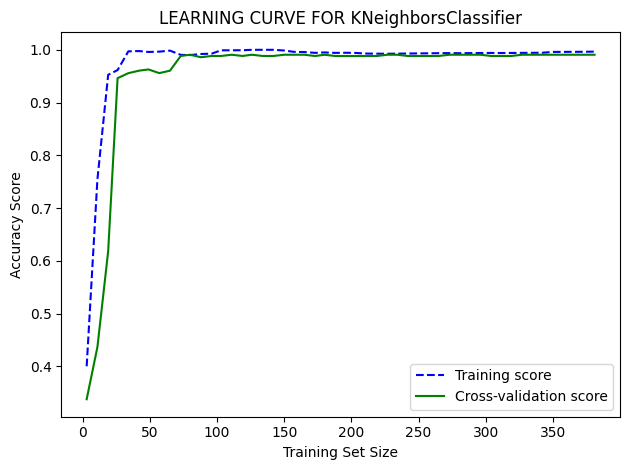

Train Accuracy 100.00%
Test Accuracy 97.65%
Classification Report on the Test dataset:
               precision    recall  f1-score   support

CONTROL GROUP       0.97      0.97      0.97        30
  DFU_LEVEL-1       1.00      1.00      1.00        21
  DFU_LEVEL-2       0.94      0.94      0.94        18
  DFU_LEVEL-3       1.00      1.00      1.00        16

     accuracy                           0.98        85
    macro avg       0.98      0.98      0.98        85
 weighted avg       0.98      0.98      0.98        85



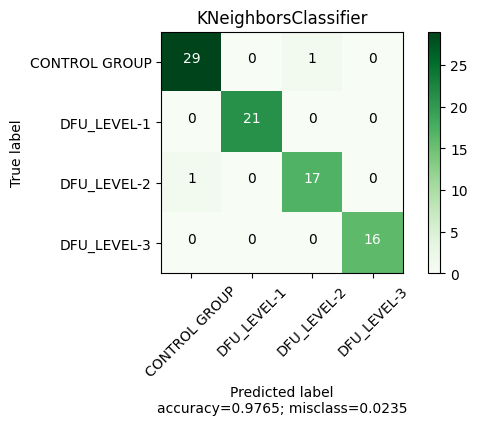

SENSITIVITY: 97.77777777777779
-------------------------------------------------------------------------


In [14]:
models = [LogisticRegression(max_iter=1000, C=1, penalty='l2'),
          SVC(C=1,gamma=0.1,kernel='rbf'),
          RandomForestClassifier(n_estimators= 1500, max_depth=12,max_features='log2', criterion='entropy'),
          KNeighborsClassifier(n_neighbors=3)]
model_name = ['LOGISTIC_REGRESSION','Support_Vector_Machine','RandomForestClassifier','KNeighborsClassifier']

def sensitivity(Y_test, y_pred_test):
    from sklearn.metrics import confusion_matrix as cm
    sensitivity = []
    cm = cm(Y_test, y_pred_test)
    for i in range(4):
        true_positives = cm[i, i]
        false_negatives = sum(cm[i, :]) - true_positives
        sensitivity.append(true_positives / (true_positives + false_negatives))

    return (np.mean(sensitivity)*100)

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

def call_model(models):
    i= 0
    for model in models:
        print('         ',model_name[i])
        sizes, training_scores, testing_scores = learning_curve(model, x_lda, labels, cv=10, scoring='accuracy',train_sizes=np.linspace(0.01, 1.0, 50))
        mean_training = np.mean(training_scores, axis=1)
        mean_testing = np.mean(testing_scores, axis=1)
        plt.plot(sizes, mean_training, '--', color="b", label="Training score")
        plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

        # Drawing plot
        plt.title("LEARNING CURVE FOR " + model_name[i])
        plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
        plt.tight_layout()
        plt.show()

        model.fit(X_train, Y_train)
        # joblib.dump(model, f'models/ML/{model_name[i]}.pkl')
        y_pred_train = model.predict(X_train)
        print('Train Accuracy %.2f%%' % (accuracy_score(Y_train, y_pred_train)*100))

        y_pred_test = model.predict(X_test)
        print('Test Accuracy %.2f%%' % (accuracy_score(Y_test, y_pred_test)*100))



        # Generate a classification report
        print('Classification Report on the Test dataset:')
        report = classification_report(Y_test, y_pred_test, target_names=['CONTROL GROUP', 'DFU_LEVEL-1', 'DFU_LEVEL-2', 'DFU_LEVEL-3'])
        print(report)


        cm = confusion_matrix(Y_test, y_pred_test)

        plot_confusion_matrix(cm = cm, normalize= False,cmap ='Greens', target_names = ['CONTROL GROUP', 'DFU_LEVEL-1', 'DFU_LEVEL-2', 'DFU_LEVEL-3'], title = model_name[i])


        print('SENSITIVITY:', sensitivity(Y_test, y_pred_test))
        print('-------------------------------------------------------------------------')
        i= i+1

call_model(models)
